In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Set the plot default style & size of parameters
sns.set_style('darkgrid')

#runtime configuration parameters
plt.rcParams['font.size']=15 
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#ffe5b4'

In [3]:
#Load the dataset
data = pd.read_csv('world-happiness-report-2021.csv')
data.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
#get the required columns of the dataset
data_columns = ['Country name','Regional indicator','Happiness score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data=data[data_columns].copy()

data_df= data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Happiness score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generocity','Perceptions of corruption':'perceptions_of_corruption'},axis=1)


#find the null values
data_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generocity                      0
perceptions_of_corruption       0
dtype: int64

# Plot between happiness score and GDP

Text(0, 0.5, 'GDP per capita')

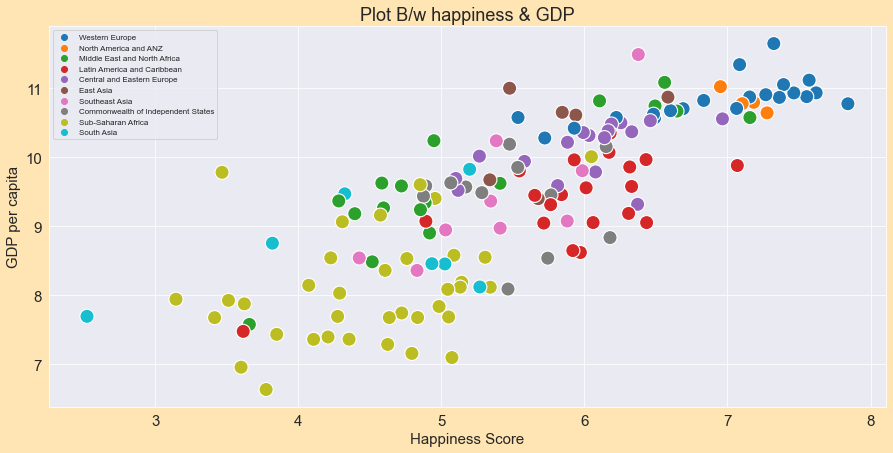

In [5]:

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot B/w happiness & GDP')
sns.scatterplot(x=data_df.happiness_score,y=data_df.logged_GDP_per_capita, hue=data_df.regional_indicator ,s=200);

#set legend location and fontsize
plt.legend(loc=2,fontsize='8')

#Name the x and y axes
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

# Plot a Pie chart for GDP by Region

In [6]:
#create variable to store the GDP per region
gdp_region= data_df.groupby('regional_indicator')[['logged_GDP_per_capita']].sum()
gdp_region

,logged_GDP_per_capita
regional_indicator,
Central and Eastern Europe,171.854
Commonwealth of Independent States,112.822
East Asia,62.206
Latin America and Caribbean,187.400
Middle East and North Africa,164.324
North America and ANZ,43.238
South Asia,60.778
Southeast Asia,84.793
Sub-Saharan Africa,290.707


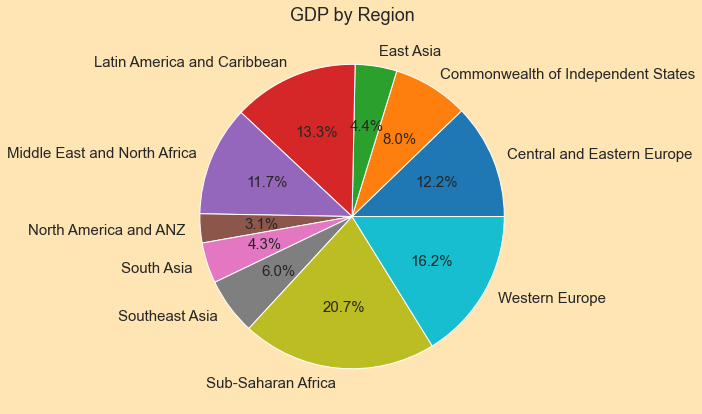

In [38]:
#plot the pie chart
gdp_region.plot.pie(y='logged_GDP_per_capita',autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')
plt.legend().remove()

In [12]:
# total country by region
total_cont = data_df.groupby('regional_indicator')[['country_name']].count()
total_cont

,country_name
regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


# Correlation map

<AxesSubplot:>

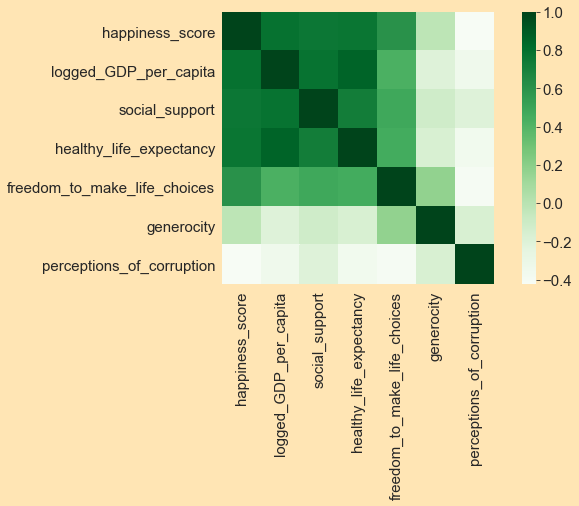

In [13]:
cor = data_df.corr(method='pearson')
fig , ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,cmap='Greens',square=True,ax=ax)

# Corruptions in regions

In [31]:
#create a variable to store the corruption
corruption = data_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

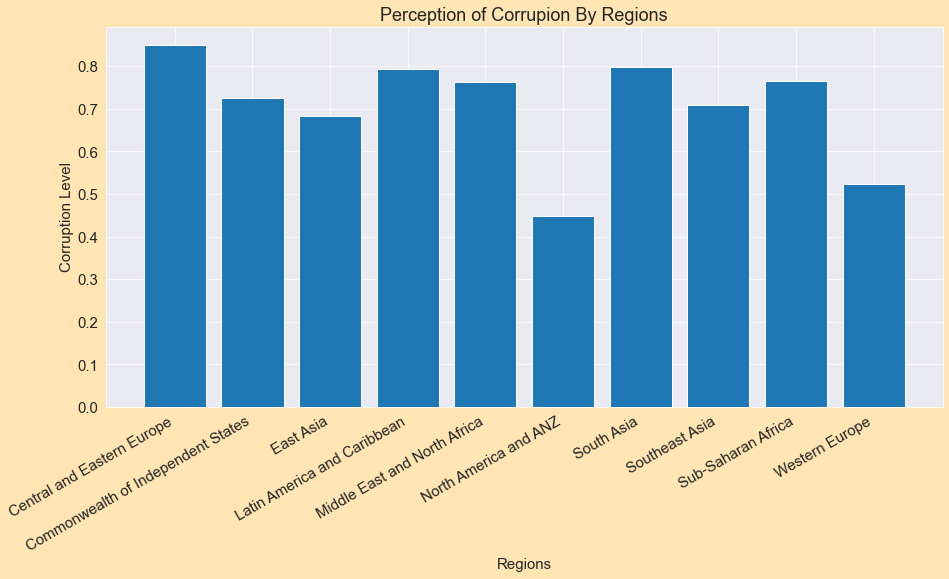

In [40]:
# set the title and both axes name
plt.title("Perception of Corrupion By Regions")
plt.xlabel('Regions')
plt.ylabel('Corruption Level')
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption.perceptions_of_corruption)

# Life expectancy of Most happiest and least happy country

In [39]:
# Get the top 10 and bottom 10 happyiest countries
top_10=data_df.head(10)
bottom_10= data_df.tail(10)

<ipython-input-40-00b6bba19f4c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
<ipython-input-40-00b6bba19f4c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(0, 0.5, ' Life Expectancy')

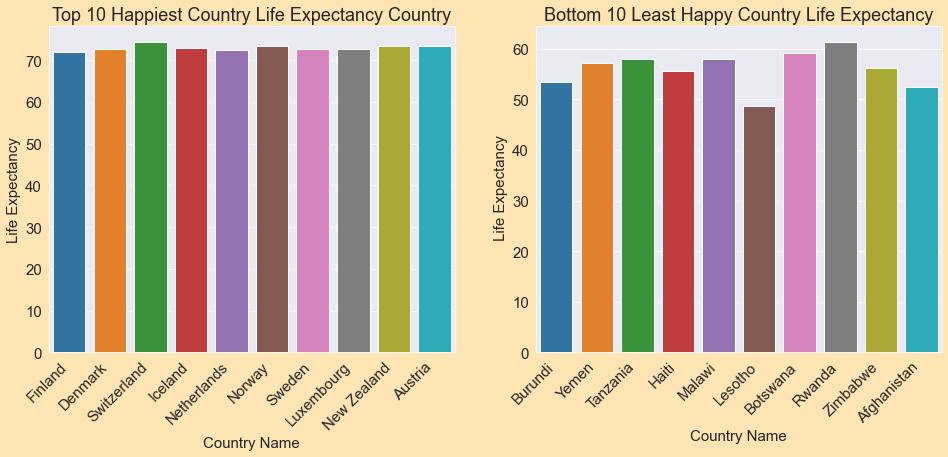

In [40]:

#set the subplots and figure size
fig, axes = plt.subplots(1,2,figsize=(16,6))

#set labels for the happiest countries
xlabels = top_10.country_name
axes[0].set_title('Top 10 Happiest Country Life Expectancy Country')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name,y=top_10.healthy_life_expectancy,ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

#set labels for the least happy countries
xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 Least Happy Country Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x= bottom_10.country_name,y= bottom_10.healthy_life_expectancy,ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel(' Life Expectancy')

# Plot a chart between Happines Score & Freedom to make life expectancy

Text(0.5, 1.0, 'Title')

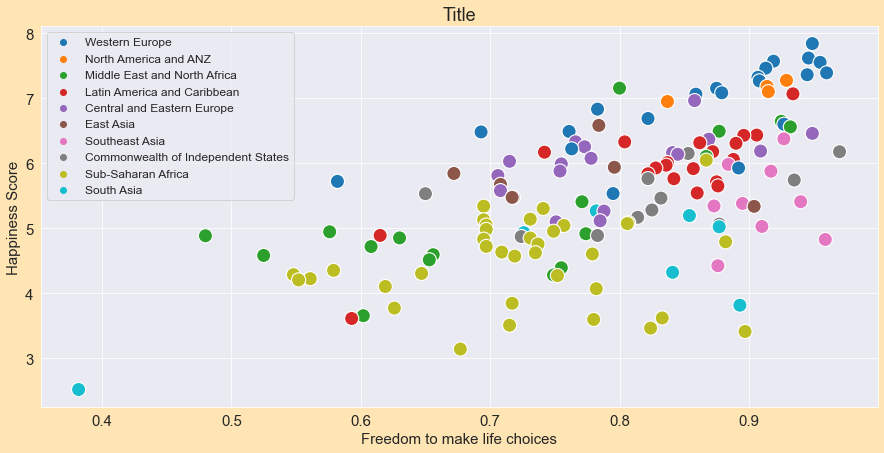

In [52]:
#using seaborn to plot the chart
sns.scatterplot(x=data_df.freedom_to_make_life_choices,y=data_df.happiness_score, hue=data_df.regional_indicator,s=200)
plt.legend(loc=2, fontsize=12)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Title')

# Most Corrupted Countries

<BarContainer object of 10 artists>

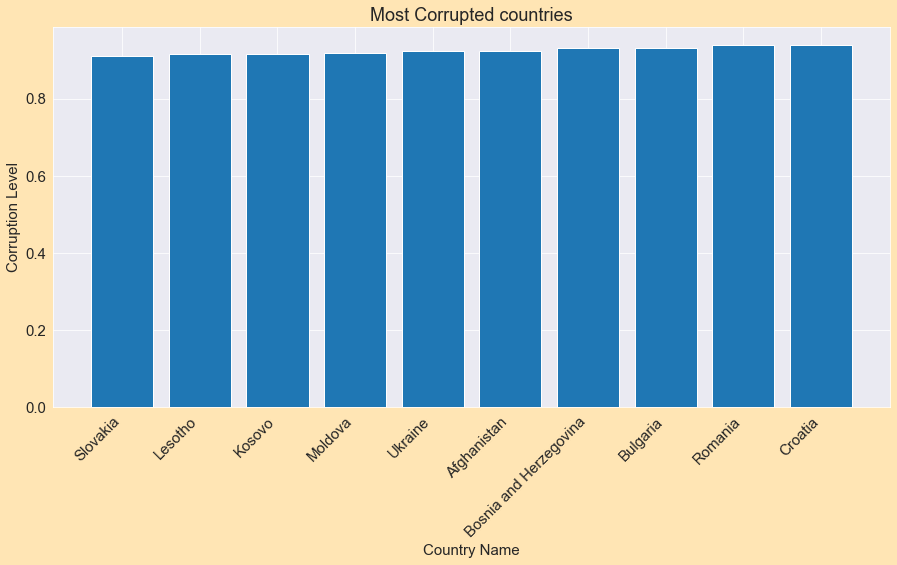

In [79]:
# store the most corrupted countries to a variable
country = data_df.sort_values(by='perceptions_of_corruption').tail(10)

#Set the title and labels
plt.title('Most Corrupted countries')
plt.xlabel('Country Name')
plt.ylabel('Corruption Level')
plt.xticks(rotation=45,ha='right')

# plot the bar chart
plt.bar(country.country_name,country.perceptions_of_corruption)


# Corruption Vs Happiness

Text(0, 0.5, 'Corruption')

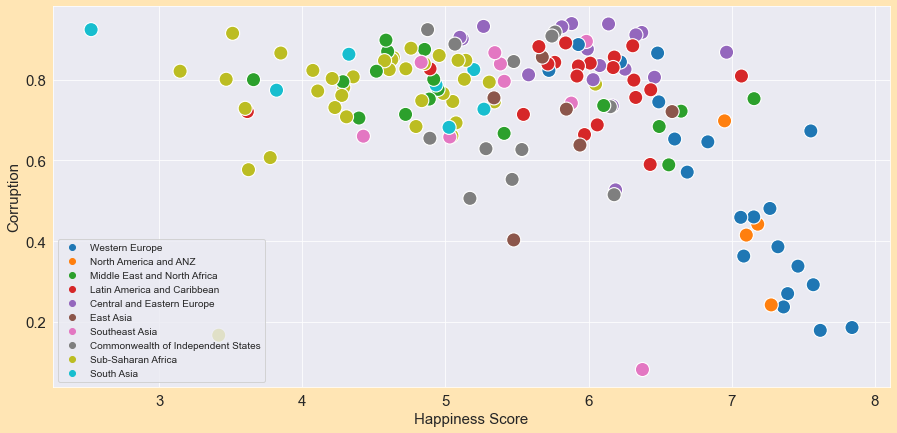

In [41]:
# Use seaborn library for the scatterplot
sns.scatterplot(x= data_df.happiness_score,y= data_df.perceptions_of_corruption,hue=data_df.regional_indicator,s=200)
plt.legend(loc=3,fontsize=10)

#set the labels
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')
